# **Обучение с учителем : Отток клиентов**

## Импорт и предобработка данных

**Импорт библиотек и настройки**

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve , roc_auc_score, auc

#from sklearn.dummy import DummyClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Импорт данных**

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv') # путь к данным для сетевой версии
except: 
    data = pd.read_csv('Churn.csv')  # путь к данным для локальной версии

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


---
**Переименование столбцов**

In [5]:
data = data.rename(columns={
    "RowNumber": "row_number", 
    "CustomerId": "customer_id", 
    "Surname": "surname", 
    "CreditScore": "credit_score", 
    "Geography": "geography", 
    "Gender": "gender", 
    "Age": "age",
    "Tenure": "tenure",
    "Balance": "balance",
    "NumOfProducts": "num_of_products",
    "HasCrCard": "has_cr_card",
    "IsActiveMember": "is_active_member",
    "EstimatedSalary": "estimated_salary",
    "Exited": "exited"})

data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Удаление дубликатов**

In [6]:
# проверим количество уникальных идентификаторов пользователя
data['customer_id'].nunique()

10000

Совпадает с количеством строк, т.е. каждая строка - уникальный пользователь. Дубликатов нет.

**Изменение формата данных**

Все данные в подходящем формате, изменения не требуются.

**Заполнение пропусков**

Пропуска есть только в колонке `tenure` и составляют около 9% всей выборки. Заменим пропуски на медианное значение, т.к. медианное значение не сместит результаты при дальнейшем обучении модели если сравнить, например, с заполнением данных нулями.

In [7]:
data['tenure'].fillna(data['tenure'].median(), inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Промежуточные выводы ### 

- Данные импортированы без проблем. 
- В рамках обработки данных названия столбцов были приведены к стилю snake. 
- Дубликатов в данных не обнаружено. 
- Формат данных не требует изменений. 
- Пропуска в данных есть в поле `tenure`, около 9%, заполнены медианным значением.

---
## Подготовка данных для обучения

**Убираем ненужные признаки**

Очевидно, ряд признаков не может влиять на решение пользователя отказаться от услуг банка. Эти признаки удалим из выборки для обучения модели:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия

In [9]:
# удалим ненужные признаки
data = data.drop(['row_number','customer_id','surname'], axis=1)

---
**Преобразуем категориальные признаки методом OHE (One-Hot Encoding)**

In [10]:
# избегаем возможной дамми-ловушки, потому drop_first=True
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Поля `geography` и `gender` были преобразованы

---
## Подготовка обучающей, валидационной и тестовой выборок

In [11]:
# определяем признаки и целевой признак
features = data_ohe.drop(['exited'], axis=1) #признаки
target = data_ohe['exited'] #целевой признак

In [12]:
# разделяем исходные данные на обучающую(60%) валидационную (20%) и тестовую(20%) выборки

# первым шагом отделяем тестовые данные
features_train, features_test, target_train, target_test = train_test_split(
   features, target, test_size=0.2, random_state=12345)

# вторым шагом отделяем валидационные данные
features_train, features_valid, target_train, target_valid = train_test_split(
   features_train, target_train, test_size=0.25, random_state=12345)


In [13]:
# проведем скалирование числовых признаков
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [14]:
print("features_train.shape", features_train.shape)
print("features_valid.shape", features_valid.shape)
print("features_test.shape", features_test.shape)

features_train.shape (6000, 11)
features_valid.shape (2000, 11)
features_test.shape (2000, 11)


---
## Исследование дисбаланса классов

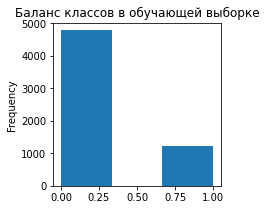

Баланс классов в обучающей выборке: 
Samples in class 0:  4781
Samples in class 1:  1219


In [15]:
# разносим отрицательные и положительные классы по разным переменным
t = [(d) for d in target_train if d==0]
s = [(d) for d in target_train if d==1]

# график
target_train.plot(kind='hist', bins=3 , range = (0,1), figsize=(3,3), title='Баланс классов в обучающей выборке' )
plt.show()

# печатаем выводы
print('Баланс классов в обучающей выборке: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

**Промежуточные выводы**

Классы не сбалансированы, наблюдается перекос в сторону отрицательных ответов.

---
## Обучение модели без балансировки классов

In [16]:
# обучим модель без балансировки классов
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

# посчитаем метрики
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)

print("Метрики обучающей -> валидационной выборки:")
print("     F1 : %0.2f" %  f1_score(target_train, predicted_train) , 
      "-> %0.2f" % f1_score(target_valid, predicted_valid))
print("AUC-ROC : %0.2f" %  roc_auc_score(target_train, model.predict_proba(features_train)[:, 1]), 
      "-> %0.2f" % roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1]))

Метрики обучающей -> валидационной выборки:
     F1 : 0.33 -> 0.30
AUC-ROC : 0.77 -> 0.77


Precision модели на валидационной выборке: 0.20460358056265984
Recall модели на валидационной выборке: 0.5714285714285714


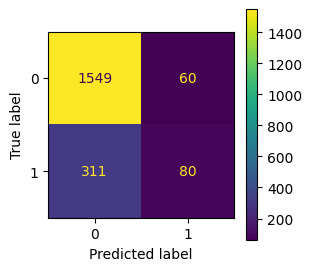

In [17]:
print("Precision модели на валидационной выборке:", precision_score(predicted_valid, target_valid ))
print("Recall модели на валидационной выборке:", recall_score(predicted_valid, target_valid))

mpl.style.use('default')  
cm = confusion_matrix(target_valid, predicted_valid, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(3,3)) 
disp.plot(ax=ax)

plt.show()

### Промежуточные выводы

Классы не сбалансированы, об этом говорит низкое значение F1-меры. Низкий Precision говорит о том, что модель не выявляет достаточное количество положительных классов. То есть не предсказывает людей, которые прекратят пользоваться услугами банка. На валидационной выборке модель не выявила 368 положительных значений цеоевого класса (более 90%). Имеет место дисбаланс классов, примерно 1 к 5. Нужна балансировка классов при обучении модели.

---
## Обучение разных моделей с балансировкой классов

**LogisticRegression**

In [18]:
# обучим модель c балансировкой классов
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

model_lr.fit(features_train, target_train)

# посчитаем метрики
predicted_train = model_lr.predict(features_train)
predicted_valid = model_lr.predict(features_valid)
 
print("     F1 : %0.2f" %  f1_score(target_train, predicted_train) , 
      "(train) -> %0.2f" % f1_score(target_valid, predicted_valid), "(valid)")
print("AUC-ROC : %0.2f" %  roc_auc_score(target_train, model_lr.predict_proba(features_train)[:, 1]), 
      "(train) -> %0.2f" % roc_auc_score(target_valid, model_lr.predict_proba(features_valid)[:, 1]), "(valid)")

     F1 : 0.50 (train) -> 0.47 (valid)
AUC-ROC : 0.77 (train) -> 0.77 (valid)


**DecisionTreeClassifier**

F1 лучшей модели: 0.5587044534412956
max_depth лучшей модели: 6


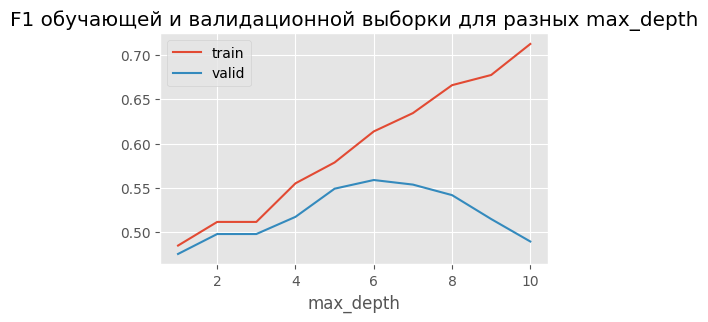

     F1 : 0.61 (train) -> 0.56 (valid)
AUC-ROC : 0.87 (train) -> 0.81 (valid)


In [19]:
best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0

plot_data=[]

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # создаем модель
    model.fit(features_train, target_train) # обучаем модель
    #model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid) # получаем предсказания модели на валидационных данных

    result = f1_score(target_valid,  model.predict(features_valid)) # оцениваем качество модели по валидационным ответам
    result_train = f1_score(target_train, model.predict(features_train))

    plot_data.append([depth,  result_train, result])
    if result > best_result_dtc: # сохраняем лучшую модель
        best_model_dtc = model
        best_result_dtc = result
        best_depth_dtc = depth

mpl.style.use('ggplot') # добавим стиля
plot_data = pd.DataFrame(plot_data)
plot_data.columns = ['max_depth','train','valid']
plot_data.set_index(['max_depth'], inplace=True)
plot_data.plot(figsize=(5,3), title='F1 обучающей и валидационной выборки для разных max_depth')
        
print("F1 лучшей модели:", best_result_dtc)
print("max_depth лучшей модели:", best_depth_dtc)

plt.show()

# посчитаем метрики
predicted_train = best_model_dtc.predict(features_train)
predicted_valid = best_model_dtc.predict(features_valid)

print("     F1 : %0.2f" %  f1_score(target_train, predicted_train) , 
      "(train) -> %0.2f" % f1_score(target_valid, predicted_valid), "(valid)")
print("AUC-ROC : %0.2f" %  roc_auc_score(target_train, best_model_dtc.predict_proba(features_train)[:, 1]), 
      "(train) -> %0.2f" % roc_auc_score(target_valid, best_model_dtc.predict_proba(features_valid)[:, 1]), "(valid)")

**RandomForestClassifier**

F1 лучшей модели: 0.5989304812834224
Количество деревьев: 60
max_depth лучшей модели: 11


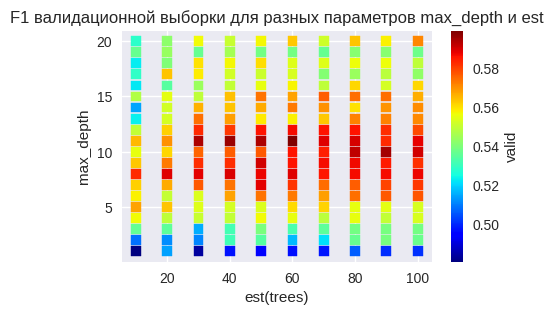

     F1 : 0.86 (train) -> 0.60 (valid)
AUC-ROC : 0.98 (train) -> 0.85 (valid)
CPU times: user 52.1 s, sys: 212 ms, total: 52.3 s
Wall time: 52.3 s


In [20]:
%%time

best_model_rfc = None
best_result_rfc = 0
best_est = 0
best_depth_rfc = 0

plot_data=[]

for est in range(10, 101, 10): # протестируем разное количество деревьев, от 10 до 100 с шагом 10
    for depth in range (1, 21):  
        model =  RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')# создаем модель 
        model.fit(features_train, target_train) # обучаем модель
        #model.fit(features_upsampled, target_upsampled)
        
        predictions = model.predict(features_valid) # получаем предсказания модели на валидационных данных
        result = f1_score(target_valid, predictions) # оцениваем качество модели по валидационным ответам
        
        plot_data.append([est, depth, result])
            
        if result > best_result_rfc:
            best_model_rfc = model
            best_result_rfc = result
            best_est = est
            best_depth_rfc = depth

print("F1 лучшей модели:", best_result_rfc)
print("Количество деревьев:", best_est)
print("max_depth лучшей модели:", best_depth_rfc)

# оторбразим на графике plt.style.available
mpl.style.use('seaborn') 
plot_data = pd.DataFrame(plot_data)
plot_data.columns = ['est(trees)', 'max_depth', 'valid']
plot_data.plot.scatter(x='est(trees)', y='max_depth', s=50, c='valid', cmap='jet', marker='s',  figsize=(5,3), 
                       title='F1 валидационной выборки для разных параметров max_depth и est')
plt.show()

# посчитаем метрики
predicted_train = best_model_rfc.predict(features_train)
predicted_valid = best_model_rfc.predict(features_valid)

print("     F1 : %0.2f" %  f1_score(target_train, predicted_train) , 
      "(train) -> %0.2f" % f1_score(target_valid, predicted_valid), "(valid)")
print("AUC-ROC : %0.2f" %  roc_auc_score(target_train, best_model_rfc.predict_proba(features_train)[:, 1]), 
      "(train) -> %0.2f" % roc_auc_score(target_valid, best_model_rfc.predict_proba(features_valid)[:, 1]), "(valid)")

**UpSampling обучающей выборки**

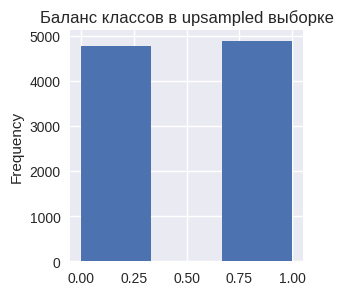

In [21]:
# функция для апсамплинга
# repeat - количество повторений 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# делаем апсамплинг, множитель повторений = 4
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# разносим отрицательные и положительные классы по разным переменным
t = [(d) for d in target_upsampled if d==0]
s = [(d) for d in target_upsampled if d==1]

# график
target_upsampled.plot(kind='hist', bins=3 , range = (0,1), figsize=(3,3), title='Баланс классов в upsampled выборке' )
plt.show()

In [22]:
# переобучим модель на upsampled диапазон данных
best_model_rfc.fit(features_upsampled, target_upsampled)
# посчитаем метрики лучшей модели
predicted_train = best_model_rfc.predict(features_train)
predicted_valid = best_model_rfc.predict(features_valid)
print('-'*40,'upsampled')
print("     F1 : %0.2f" %  f1_score(target_train, predicted_train) , 
      "(train) -> %0.2f" % f1_score(target_valid, predicted_valid), "(valid)")
print("AUC-ROC : %0.2f" %  roc_auc_score(target_train, best_model_rfc.predict_proba(features_train)[:, 1]), 
      "(train) -> %0.2f" % roc_auc_score(target_valid, best_model_rfc.predict_proba(features_valid)[:, 1]), "(valid)")

---------------------------------------- upsampled
     F1 : 0.86 (train) -> 0.59 (valid)
AUC-ROC : 0.99 (train) -> 0.85 (valid)


---
**Промежуточные выводы**

Метрики до апсамплинга:
- F1 : 0.81 (train) -> 0.60 (valid)
- AUC-ROC : 0.97 (train) -> 0.85 (valid)

Метрики на upsampled выборке:
- F1 : 0.80 (train) -> 0.59 (valid)
- AUC-ROC : 0.97 (train) -> 0.85 (valid)

На Upsampled данных метрика F1 несколько снизилась, что отдаляет нас от цели задания. Остановим выбор на оригинальных данных.

---

In [23]:
# фиксируем лучшую модель
best_model = best_model_rfc.fit(features_train, target_train)

Precision модели на валидационной выборке: 0.5728900255754475
Recall модели на валидационной выборке: 0.6274509803921569


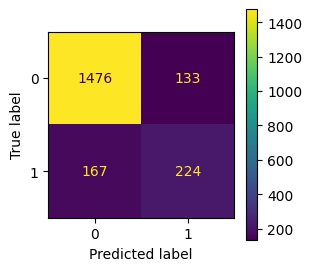

In [24]:
predicted_valid = best_model.predict(features_valid)
print("Precision модели на валидационной выборке:", precision_score(predicted_valid, target_valid ))
print("Recall модели на валидационной выборке:", recall_score(predicted_valid, target_valid))

mpl.style.use('default')  
cm = confusion_matrix(target_valid, predicted_valid, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(3,3)) 
disp.plot(ax=ax)

plt.show()

### Промежуточные выводы

Применение параметра class_weight='balanced' дает позитивные результаты - для модели логистической регрессии удалось повысить метрику F1 c 0.10 до 0.47. Однако результаты для логистической регрессии ниже целевых - 0.59.

Были испытаны модели `решающего дерева` и `случайного леса`, где вторая показала наилучшие результаты. Для 90 деревьев с максимальной глубиной 10 **метрика F1 составляет 0.60**, у этой модели есть предпосылки достигнуть целевого уровня на тестовой выборке.

---
## ROC кривая

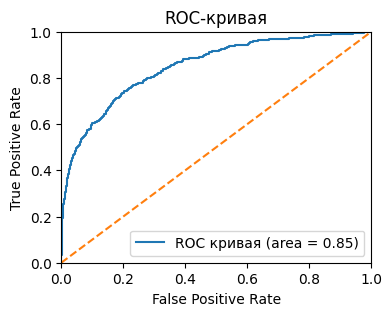

In [25]:
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(4,3))

# ROC-кривая лучшей модели
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC кривая (area = %0.2f)' % roc_auc)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--' )

# установим границы осей от 0 до 1
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate" )
plt.title("ROC-кривая")
plt.legend(loc="lower right")

plt.show()

---
## Финальное тестирование

In [26]:
# переобучим лучшую модель на объединенных данных из обучающей и валидационной выборок
features_combine = pd.concat([features_train,features_valid])
target_combine = pd.concat([target_train,target_valid])
best_model.fit(features_combine, target_combine) # переобучаем модель

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=60,
                       random_state=12345)

In [27]:
# проверка значения метрики F1 на тестовой выборке

# получим предсказания модели на тестовой выборке
predicted_test = best_model.predict(features_test)

# посчитаем F1-меру
print("F1 лучшей модели на тестовой выборке:", f1_score(target_test, predicted_test))

# посчитаем AUC-ROC
print("AUC-ROC лучшей модели на тестовой выборке:", roc_auc_score(target_test, best_model.predict_proba(features_test)[:, 1]))

F1 лучшей модели на тестовой выборке: 0.6271186440677966
AUC-ROC лучшей модели на тестовой выборке: 0.8633452985166845


---
## Общий вывод

**Импорт и предобработка данных**
- Данные были импортированы без проблем.
- В рамках обработки данных названия столбцов были приведены к стилю snake.
- Пропуска в данных есть в поле tenure, около 9%, заполнены медианным значением.

**Подготовка данных для обучения модели**
- Некоторые данные, бесполезные в рамках текущей задачи, были удалены из выборки.
- Категориальные переменные были разделены методом OHE.
- Исходные данные были разделены на обучающую, валидационную и тестовую выборку в пропорции 3:1:1

**Баланс классов**
- Классы не сбалансированы, об этом говорит низкое значение F1-меры при прогоне модели без балансировки классов. Низкий Precision говорит о том, что модель не выявляет достаточное количество положительных классов. То есть не предсказывает людей, которые прекратят пользоваться услугами банка. На валидационной выборке модель не выявила 368 положительных значений цеоевого класса (более 90%). Имеет место дисбаланс классов, примерно 1 к 5. Потребовалась балансировка классов при обучении модели.
- С включенной балансировкой классов были испытаны модели логистической регрессии, решающего дерева и случайного леса, где последняя показала наилучшие результаты. Для 90 деревьев с максимальной глубиной 10 метрика F1 составляет 0.596, что превышает целевой уровнь.
- Лучшая модель была дополнительно проверена на upsampled выборке, однако метрика F1 несколько ухудшилась

**Итоговая модель**
- В конечном итоге получили модель с F1 параметром 0.60 на валидационной выборке и 0.63 на тестовой. Что соответствует критериям задания.

- [x] При масштабировании сделать fit скелера только на трейне.  
- [x] Исследовать дисбаланс классов. 
- [x] Вычислить значения обоих метрик F1 и ROC-AUC для всех моделей. 
- [x] Исследовано меньше двух способов работы с дисбалансом. 
- [x] Запустить весь код без ошибок. 
- [x] Скорректировать все выводы. 
 